In [ ]:
!pip install pandas seaborn scikit-learn matplotlib

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List files in the data directory
!ls "/content/drive/MyDrive/Data/"

'Data Scientist - Assignment.pdf'   takehome_user_engagement.csv   takehome_users.csv


In [ ]:
# Detailed file listing
!ls -l "/content/drive/MyDrive/Data/"

total 7033
-rw------- 1 root root  217589 Apr 17 11:24 'Data Scientist - Assignment.pdf'
-rw------- 1 root root 5832711 Apr 17 11:28  takehome_user_engagement.csv
-rw------- 1 root root 1150701 Apr 17 11:24  takehome_users.csv


In [ ]:
# Check file types
!file "/content/drive/MyDrive/Data/takehome_users.csv"

/content/drive/MyDrive/Data/takehome_users.csv: CSV text


In [ ]:
# Check file types
!file "/content/drive/MyDrive/Data/takehome_user_engagement.csv"

/content/drive/MyDrive/Data/takehome_user_engagement.csv: CSV text


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import time

In [ ]:
# Load data
users_df = pd.read_csv("/content/drive/MyDrive/Data/takehome_users.csv", encoding="latin-1")
engagement_df = pd.read_csv("/content/drive/MyDrive/Data/takehome_user_engagement.csv", encoding="latin-1")

In [ ]:
# Inspect data
print(users_df.head())
print(engagement_df.head())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [ ]:
users_df.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04


In [ ]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [ ]:
engagement_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
engagement_df.user_id.nunique()

8823

In [ ]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
# Convert timestamp columns to datetime
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'] ,unit='s')

In [ ]:
users_df.last_session_creation_time.dtypes

dtype('<M8[ns]')

In [ ]:
users_df.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [ ]:
users_df['last_session_creation_time'].min(), users_df['last_session_creation_time'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [ ]:
users_df['creation_time'].min(), users_df['creation_time'].max()

('2012-05-31 00:43:27', '2014-05-30 23:59:19')

In [ ]:
# Preprocess engagement data
df = engagement_df.copy()

In [ ]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [ ]:
df['date'] = df['time_stamp'].dt.date

In [ ]:
df['date'] = pd.to_datetime(df.time_stamp.dt.date)

In [ ]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()

In [ ]:
df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
time_stamp,207917,2013-10-30 05:06:45.648763648,2012-05-31 08:20:06,2013-07-16 20:17:21,2013-12-03 06:38:34,2014-03-13 08:00:24,2014-06-06 14:58:50,NaN
user_id,207917.0,5913.314197,1.0,3087.0,5682.0,8944.0,12000.0,3394.941674
visited,207917.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
date,207917,2013-10-29 16:42:23.861252352,2012-05-31 00:00:00,2013-07-16 00:00:00,2013-12-03 00:00:00,2014-03-13 00:00:00,2014-06-06 00:00:00,NaN
visits_7_days,207917.0,4.381393,1.0,3.0,4.0,6.0,7.0,2.042666


In [ ]:
df[df.visits_7_days >= 3.0]

,time_stamp,user_id,visited,date,visits_7_days
9,2014-02-09 03:45:04,2,1,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014-05-23,6.0
207899,2014-05-24 11:04:47,11988,1,2014-05-24,6.0
207900,2014-05-26 11:04:47,11988,1,2014-05-26,5.0
207901,2014-05-27 11:04:47,11988,1,2014-05-27,5.0


In [ ]:
user_adopted = df.groupby('user_id')['visits_7_days'].max().reset_index()

In [ ]:
user_adopted['adopted_user'] = user_adopted['visits_7_days'].apply(lambda x: 1 if x>=3 else 0)

In [ ]:
user_adopted.head()

,user_id,visits_7_days,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [ ]:
user_adopted.adopted_user.value_counts()

adopted_user
0    7221
1    1602
Name: count, dtype: int64

In [ ]:
user_adopted.drop('visits_7_days', axis = 1, inplace = True)
user_adopted.rename(columns={"user_id": "object_id"}, inplace=True)

In [ ]:
user_adopted.set_index("object_id", inplace = True)

In [ ]:
df_users = users_df.join(user_adopted, on = 'object_id', how='left')

In [ ]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                8823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


## The null values in the adopted_user and last_session_creation_time can be filled in with 0 because we can assume that those users aren't adopted users.

In [ ]:
# Fill missing values
df_users['last_session_creation_time'].fillna(0, inplace = True)
df_users['adopted_user'].fillna(0, inplace = True)

In [ ]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.25,12000.0
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.00,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.00,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.00,108.0,238.25,416.0
invited_by_user_id,6417.0,5962.957145,3383.761968,3.0,3058.00,5954.0,8817.00,11999.0
adopted_user,12000.0,0.133500,0.340128,0.0,0.00,0.0,0.00,1.0


Let's see if we can extract useful information from the email variable like it's domain.

In [ ]:
# Extract email domains
df_users['email_domain'] = df_users.email.apply(lambda x: x.split('@')[1])

In [ ]:
df_users['email_domain'].value_counts()

email_domain
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: count, Length: 1184, dtype: int64

In [ ]:
#Checking the creation_source for NON NULL invited_by_user column
df_users[~df_users.invited_by_user_id.isnull()].creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

# Data Preprocessing:

# Dropping Columns:

Remove the email_domain column due to numerous potentially fake domains.
Drop the name and object_id columns, as they are not relevant for our analysis.
Exclude the last_session_creation_time column as it was used to create the adopted_user column.
Handling Missing Values:

Convert NULL values in the invited_by_user_id column to 0. This column has Non-Null values only if the creation_source was a GUEST_INVITE or an ORG_INVITE.
Feature Engineering:

Calculate the age of the account by adding a new column that represents the number of days since the account was created. This will provide insights into user behavior over time.

## Objective:
Our aim is to explore user adoption patterns by fitting a Random Forest Regression model and analyzing feature importance. By preprocessing the data appropriately, we can ensure that our model captures meaningful insights without being influenced by irrelevant or redundant information.

Let's proceed with these data preprocessing steps before training the Random Forest Regression model.

In [ ]:
# Drop irrelevant columns
df_users.drop(['object_id', 'name', 'email', 'email_domain'], axis = 1, inplace = True)

In [ ]:
# Convert NULL values in invited_by_user_id to 0
df_users.invited_by_user_id.fillna(0, inplace=True)

In [ ]:
# Convert data types
print(engagement_df.time_stamp.dtype)
print(df_users.creation_time.dtype)

object
object


In [ ]:
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])

In [ ]:
# Calculate days since creation
df_users['days_since_creation'] = (engagement_df.time_stamp.max() - df_users.creation_time).dt.days

In [ ]:
# Drop unnecessary columns
df_users.drop(['creation_time', 'last_session_creation_time'], axis = 1, inplace = True)

OneHotEncode the creation_source column.

In [ ]:
# One-hot encode creation_source column
df_users = pd.get_dummies(df_users, columns=['creation_source'])

In [ ]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
invited_by_user_id,12000.0,3188.691333,3869.027693,0.0,0.0,875.0,6317.00,11999.0
adopted_user,12000.0,0.133500,0.340128,0.0,0.0,0.0,0.00,1.0
days_since_creation,12000.0,324.568000,216.646173,6.0,129.0,304.0,506.00,736.0


In [ ]:
# Correlation analysis
df_users.corr()['adopted_user']

opted_in_to_mailing_list              0.008097
enabled_for_marketing_drip            0.004653
org_id                                0.064523
invited_by_user_id                    0.021596
adopted_user                          1.000000
days_since_creation                   0.088020
creation_source_GUEST_INVITE          0.045408
creation_source_ORG_INVITE           -0.007636
creation_source_PERSONAL_PROJECTS    -0.075817
creation_source_SIGNUP                0.009299
creation_source_SIGNUP_GOOGLE_AUTH    0.036119
Name: adopted_user, dtype: float64

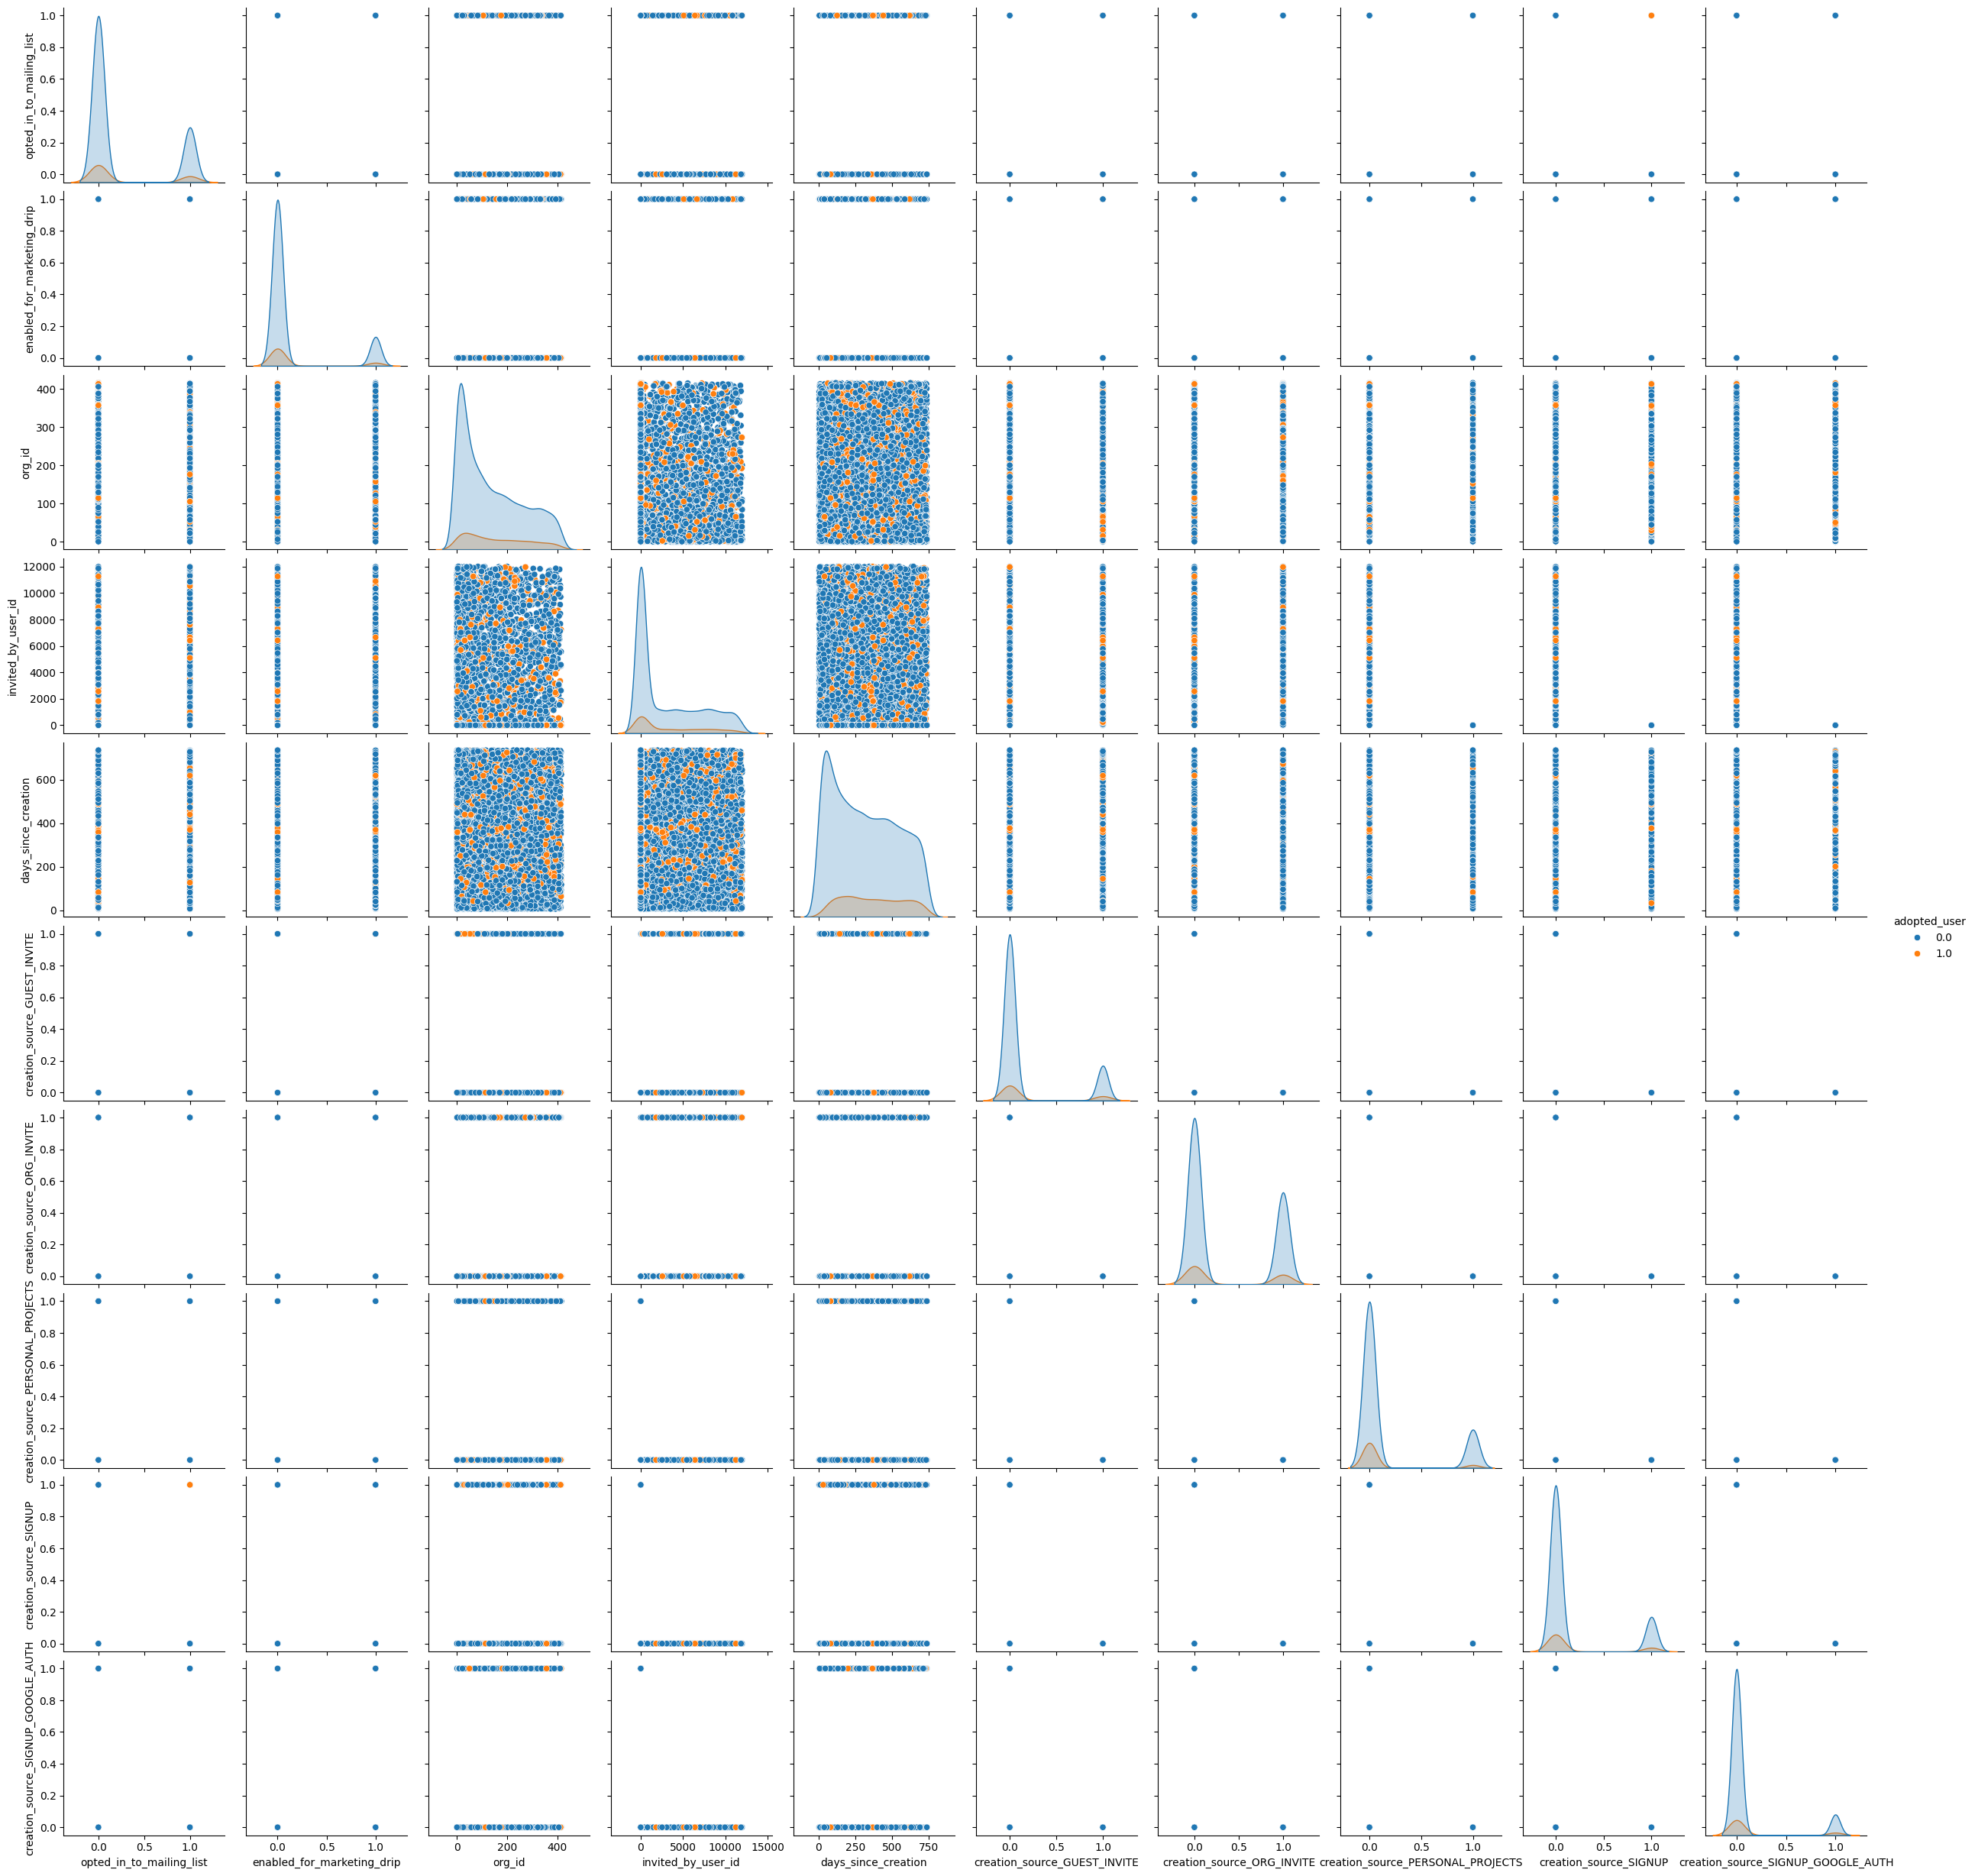

In [ ]:
# Data visualization
sns.pairplot(df_users, hue = 'adopted_user')

In [ ]:
df_users['opted_in_to_mailing_list'] = df_users['opted_in_to_mailing_list'].astype(str)
df_users['enabled_for_marketing_drip'] = df_users['enabled_for_marketing_drip'].astype(str)

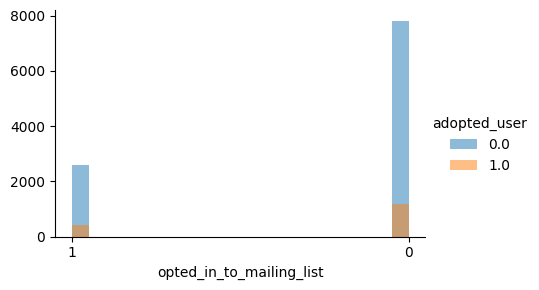

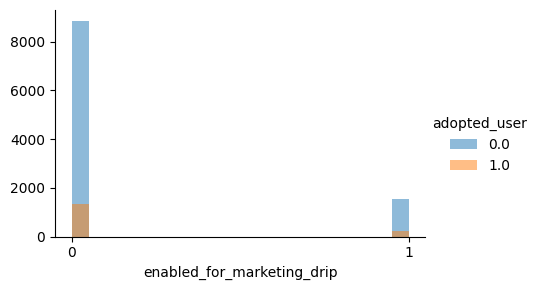

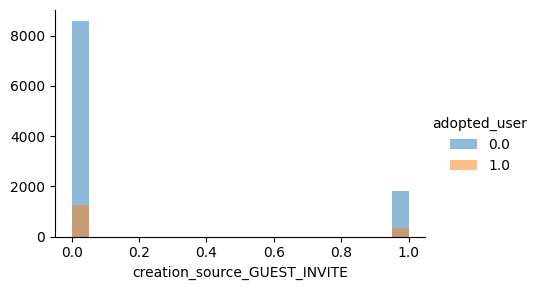

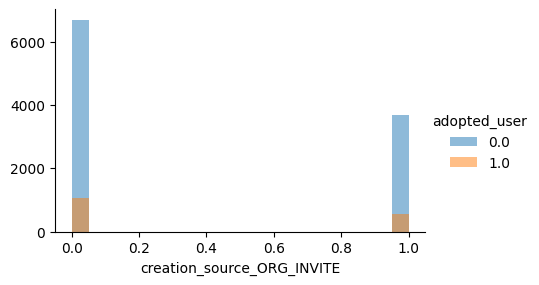

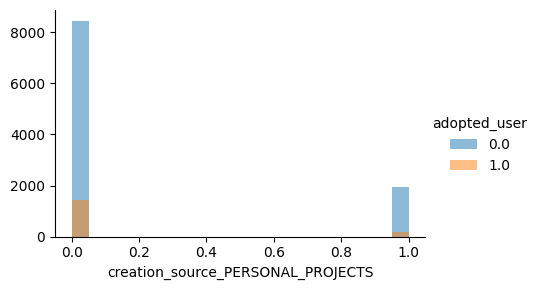

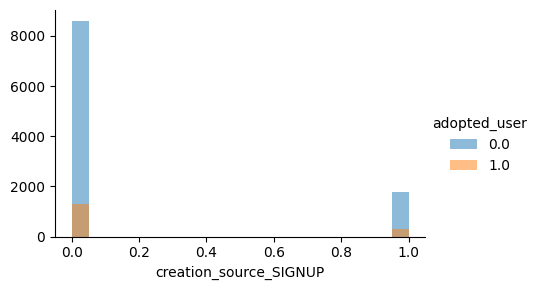

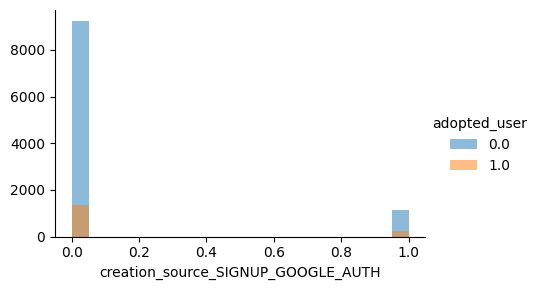

In [ ]:
# Identify the problematic column
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source_GUEST_INVITE',
           'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
           'creation_source_SIGNUP_GOOGLE_AUTH']:
    if df_users[col].dtype == bool:
        df_users[col] = df_users[col].astype(int)

# Rerun the code
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source_GUEST_INVITE',
           'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
           'creation_source_SIGNUP_GOOGLE_AUTH']:
    g = sns.FacetGrid(df_users, hue = "adopted_user", height=3, aspect=1.5,)
    g.map(plt.hist, col, alpha=.5, bins = 20)
    g.add_legend()

<ipython-input-313-4e1f3a0a9314>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_users['days_since_creation'], kde = False, bins = 20)


<Axes: xlabel='days_since_creation'>

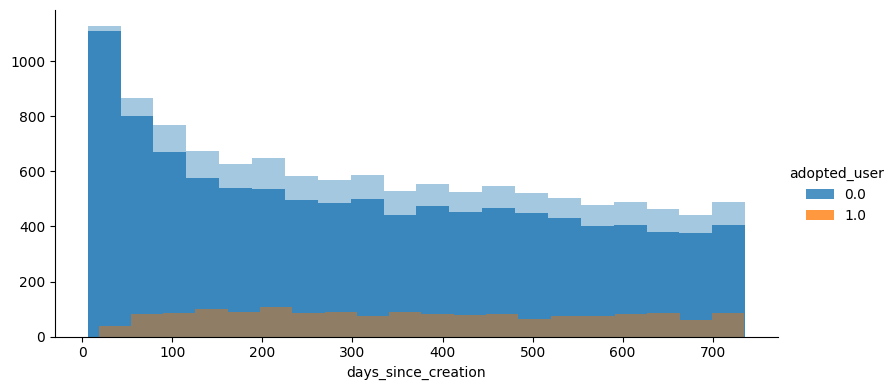

In [ ]:
g = sns.FacetGrid(df_users, hue = "adopted_user", height=4, aspect=2,)
_ = g.map(plt.hist, 'days_since_creation', alpha=0.8, bins = 20)
_ = g.add_legend()
sns.distplot(df_users['days_since_creation'], kde = False, bins = 20)

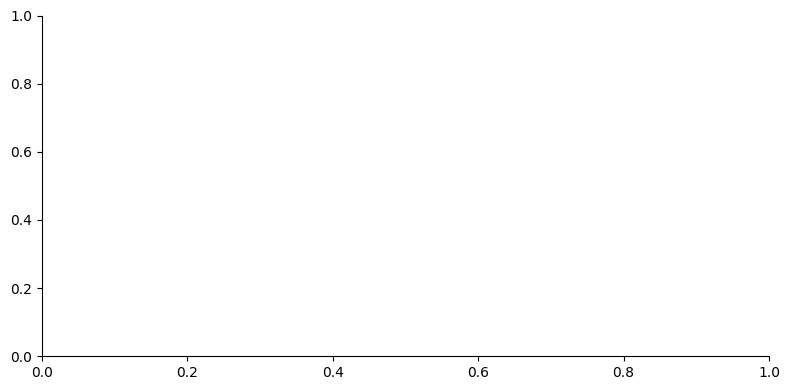

In [ ]:
g = sns.FacetGrid(df_users, hue = "adopted_user", height=4, aspect=2)

# Task:
Given that only about 13% of the total 12,000 users are adopted, our objective is to fit a Random Forest Regression model and identify feature importance. This will help us understand which factors contribute most to user adoption.

# Data Overview:
We have two datasets:

users_df: Contains user information like creation time, email domains, and creation source.
engagement_df: Records user engagement data, including timestamps of user visits.
Approach:

# Data Preparation:

Identify adopted users based on engagement data, where adoption is defined as having at least 3 visits within any 7-day period.
Merge the adopted user information with the user dataset.
Feature Engineering:

Calculate the number of days since user creation.
Drop unnecessary columns and one-hot encode categorical features.
Model Training:

Split the data into training and testing sets.
Fit a Random Forest Regression model with 100 estimators.
Feature Importance Analysis:

Extract feature importance from the trained model.
Visualize feature importance using a horizontal bar plot.
Results and Interpretation:
We'll interpret the feature importance plot to discern which factors have the greatest impact on user adoption.

# Let's proceed with the implementation.

In [ ]:
# Importing packages for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,\
precision_score, recall_score, f1_score

In [ ]:
# Function for cross-validation
def cv_optimize(model, parameters, Xtrain, ytrain, n_folds = 5):
    """
    Cross validation. Function to hypertune the model "model" with the input paramete distribution using
    "parameters" on the training data.
    The output will be the best estimator whose average score on all folds will be best.
    """
    clf = GridSearchCV(model, param_grid = parameters, cv = n_folds, scoring = 'accuracy')
    t0 = time.time()
    clf.fit(Xtrain, ytrain)
    time_fit = time.time() - t0
    print('\n\n\n=============================',type(model).__name__,'=================================\n')
    print("It takes %.3f seconds for tuning " % (time_fit))
    print("BEST PARAMS", clf.best_params_)
    best = clf.best_estimator_
    return best

In [ ]:
# Function for model fitting and evaluation
def do_classify(model, parameters, df, targetname, scale = True, cols_to_transform = 'numeric',
                featurenames = 'all', train_size = 0.8):

    # Creating the X and y variables for our model
    if featurenames == 'all':
        X = df.drop([targetname], axis = 1)
    else:
        X = df[featurenames]

    y = df[targetname]

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = train_size)

    model = cv_optimize(model, parameters, Xtrain, ytrain)
    t0 = time.time()
    model = model.fit(Xtrain, ytrain)
    time_fit = time.time() - t0
    print("It takes %.3f seconds for fitting" % (time_fit))
    training_accuracy = model.score(Xtrain, ytrain)
    test_accuracy = model.score(Xtest, ytest)
    precision = precision_score(ytest, model.predict(Xtest))
    recall = recall_score(ytest, model.predict(Xtest))
    AUC = roc_auc_score(ytest, model.predict_proba(Xtest)[:,1])

    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    print("Precision on test data:    {:0.2f}".format(precision))
    print("Recall on test data:       {:0.2f}".format(recall))
    print("AUC on test data:          {:0.2f}".format(AUC))
    print("=======Confusion Matrix=========")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("=======Classification report=======")
    print(classification_report(ytest, model.predict(Xtest)))
    print("="*100)
    print("="*100)
    print("="*100)
    return model, Xtrain, ytrain, Xtest, ytest

In [ ]:
# Random Forest model
model_rf = RandomForestClassifier(class_weight='balanced') # adding balanced to handle the unbalanced data
parameters_rf = {
                 'n_estimators': [10, 25, 50, 75, 100],
                 'criterion': ["gini", "entropy"],
                 'max_depth': [3, 6, 10, 12],
                 'max_features': ['auto', 'sqrt']
                }

In [ ]:
# model_rf, Xtrain, ytrain, Xtest, ytest = do_classify(model_rf, parameters_rf,  df_users, targetname = 'adopted_user')

model_rf, Xtrain, ytrain, Xtest, ytest = do_classify(model_rf, parameters_rf,  df_users, targetname = 'adopted_user')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor




============================= RandomForestClassifier =================================

It takes 171.889 seconds for tuning 
BEST PARAMS {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}
It takes 3.962 seconds for fitting
Accuracy on training data: 0.83
Accuracy on test data:     0.70
Precision on test data:    0.16
Recall on test data:       0.33
AUC on test data:          0.61
=======Confusion Matrix=========
[[1578  518]
 [ 204  100]]
=======Classification report=======
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81      2096
         1.0       0.16      0.33      0.22       304

    accuracy                           0.70      2400
   macro avg       0.52      0.54      0.52      2400
weighted avg       0.79      0.70      0.74      2400



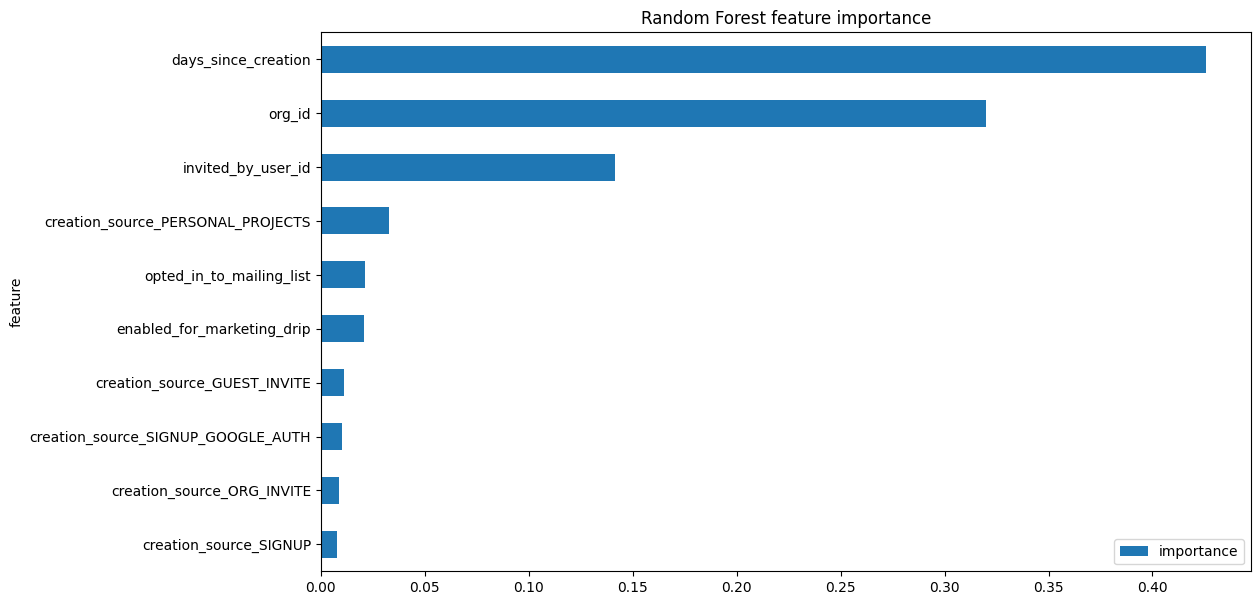

In [ ]:
feat_imp = pd.DataFrame({'importance':model_rf.feature_importances_})
feat_imp['feature'] = Xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
_ = feat_imp.plot.barh(title = 'Random Forest feature importance', figsize = (12,7))

In [ ]:
# The top 5 important features seem to be:
# days_since_creation
# org_id
# invited_by_user_id
# creation_source_PERSONAL_PROJECTS
# opted_in_to_mailing_list
# Furture possible work: We can also add a feature which calculates the difference between the creation date of the account and the first login of the user.   generate text cell

print("Top 5 important features:")
print(feat_imp.head())


Top 5 important features:
                                    importance
feature                                       
creation_source_SIGNUP                0.007760
creation_source_ORG_INVITE            0.008745
creation_source_SIGNUP_GOOGLE_AUTH    0.010026
creation_source_GUEST_INVITE          0.011166
enabled_for_marketing_drip            0.020733
